<a href="https://colab.research.google.com/github/MichaelTj02/FinalProject_Group1/blob/main/LicensePlate_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training license plate character detection using Tesseract OCR**

# Convert label and image file

**Convert XML labels to .box for Tesseract compatibility**



In [ ]:
import os
import xml.etree.ElementTree as ET

# Define function to convert XML to .box
def convert_xml_to_box(xml_path, image_name, output_dir):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    box_path = os.path.join(output_dir, image_name + ".box")
    with open(box_path, "w") as box_file:
        for obj in root.findall("object"):
            character = obj.find("name").text
            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find("ymax").text)

            # Write in Tesseract .box format
            box_file.write(f"{character} {xmin} {ymin} {xmax} {ymax} 0\n")

# Process all XML files in train and test folders
def process_labels(label_dir, output_dir):
    for split in ["train", "test"]:
        split_dir = os.path.join(label_dir, split)
        output_split_dir = os.path.join(output_dir, split)
        os.makedirs(output_split_dir, exist_ok=True)

        for xml_file in os.listdir(split_dir):
            if xml_file.endswith(".xml"):
                image_name = os.path.splitext(xml_file)[0]
                xml_path = os.path.join(split_dir, xml_file)
                convert_xml_to_box(xml_path, image_name, output_split_dir)

# Paths
label_dir = r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels"
output_dir = r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels(box)"
process_labels(label_dir, output_dir)

**Convert images to tiff**

In [ ]:
import os
from PIL import Image

def convert_images_to_tiff(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

    for filename in os.listdir(input_dir):
        if filename.endswith((".png", ".jpg", ".jpeg")):  # Check for valid image files
            image_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + ".tif")

            # Open the image and save as TIFF
            with Image.open(image_path) as img:
                img = img.convert("RGB")  # Convert to RGB mode if necessary
                img.save(output_path, format="TIFF")
                print(f"Converted {filename} to {output_path}")

# Paths
convert_images_to_tiff(r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\train"
                        , r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train")
convert_images_to_tiff(r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\test"
                        , r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\test")


Converted 0000.png to C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train\0000.tif
Converted 0001.png to C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train\0001.tif
Converted 0003.png to C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train\0003.tif
Converted 0004.png to C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train\0004.tif
Converted 0005.png to C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train\0005.tif
Converted 0006.png to C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train\0006.tif
Converted 0008.png to C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train\0008.tif
Converted 0009.png to C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\train\0009.tif
Converted 0010.png to C:

# Testing default model

Test default tesseract model accuracy

In [14]:
import os
from PIL import Image
from IPython.display import display

In [15]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

print(pytesseract.get_tesseract_version())

5.5.0.20241111


In [16]:
# Set directories
tiff_dir = r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images(tiff)\test"
output_dir = r"C:\Users\mtj02\Desktop\test_result"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

Processing 0190.tif:


Extracted Text: TH 45 BA 1065)


Result saved to: C:\Users\mtj02\Desktop\test_result\0190.txt
Processing 0191.tif:


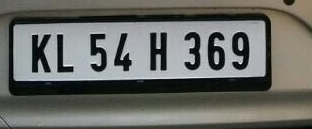

Extracted Text: PKL 54 H 369

La

Result saved to: C:\Users\mtj02\Desktop\test_result\0191.txt
Processing 0192.tif:


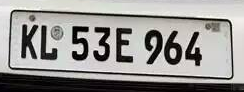

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0192.txt
Processing 0193.tif:


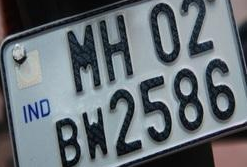

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0193.txt
Processing 0195.tif:


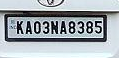

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0195.txt
Processing 0198.tif:


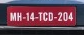

Extracted Text: un.14-00-206


Result saved to: C:\Users\mtj02\Desktop\test_result\0198.txt
Processing 0199.tif:


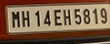

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0199.txt
Processing 0201.tif:


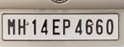

Extracted Text: —

MH 14EP 4660

Result saved to: C:\Users\mtj02\Desktop\test_result\0201.txt
Processing 0202.tif:


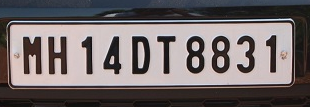

Extracted Text: [4H 14078831]

Result saved to: C:\Users\mtj02\Desktop\test_result\0202.txt
Processing 0203.tif:


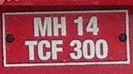

Extracted Text: MH 14
TCF 300

Result saved to: C:\Users\mtj02\Desktop\test_result\0203.txt
Processing 0204.tif:


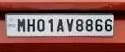

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0204.txt
Processing 0205.tif:


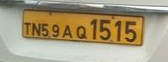

Extracted Text: TesaalS15)

Result saved to: C:\Users\mtj02\Desktop\test_result\0205.txt
Processing 0206.tif:


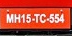

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0206.txt
Processing 0207.tif:


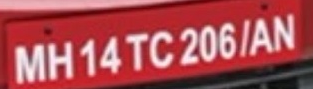

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0207.txt
Processing 0208.tif:


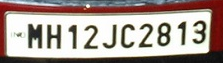

Extracted Text: -MH12JC2813


Result saved to: C:\Users\mtj02\Desktop\test_result\0208.txt
Processing 0209.tif:


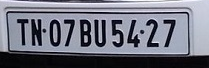

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0209.txt
Processing 0210.tif:


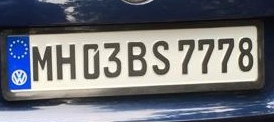

Extracted Text: BMHO3BS 7778

ae

Result saved to: C:\Users\mtj02\Desktop\test_result\0210.txt
Processing 0211.tif:


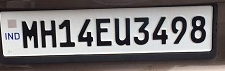

Extracted Text: MH14EU3498

Result saved to: C:\Users\mtj02\Desktop\test_result\0211.txt
Processing 0212.tif:


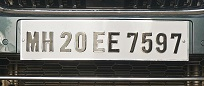

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0212.txt
Processing 0213.tif:


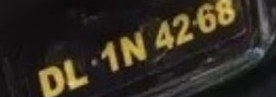

Extracted Text: 028”)

“ 0

Result saved to: C:\Users\mtj02\Desktop\test_result\0213.txt
Processing 0214.tif:


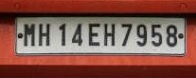

Extracted Text: HH 14EH 7958+

Result saved to: C:\Users\mtj02\Desktop\test_result\0214.txt
Processing 0215.tif:


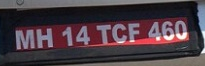

Extracted Text: MH 14 Tor a6

Result saved to: C:\Users\mtj02\Desktop\test_result\0215.txt
Processing 0216.tif:


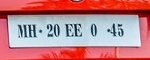

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0216.txt
Processing 0217.tif:


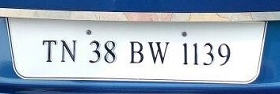

Extracted Text: ———————_
TN 38 BW 1139 I

Result saved to: C:\Users\mtj02\Desktop\test_result\0217.txt
Processing 0218.tif:


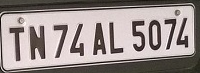

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0218.txt
Processing 0219.tif:


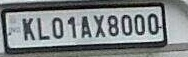

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0219.txt
Processing 0220.tif:


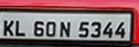

Extracted Text: KL 50N 5344 ]

Result saved to: C:\Users\mtj02\Desktop\test_result\0220.txt
Processing 0221.tif:


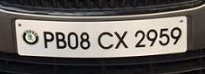

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0221.txt
Processing 0222.tif:


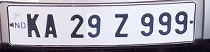

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0222.txt
Processing 0223.tif:


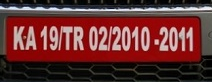

Extracted Text: KAASITR 02/2010 -2011

Result saved to: C:\Users\mtj02\Desktop\test_result\0223.txt
Processing 0224.tif:


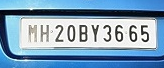

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0224.txt
Processing 0226.tif:


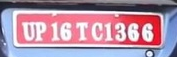

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0226.txt
Processing 0227.tif:


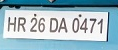

Extracted Text: HR 26 DA 0474]

Result saved to: C:\Users\mtj02\Desktop\test_result\0227.txt
Processing 0228.tif:


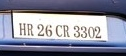

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0228.txt
Processing 0229.tif:


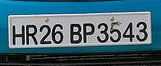

Extracted Text: HR26 BP3543

Result saved to: C:\Users\mtj02\Desktop\test_result\0229.txt
Processing 0230.tif:


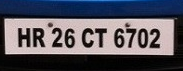

Extracted Text: HR 26 CT 6702

Result saved to: C:\Users\mtj02\Desktop\test_result\0230.txt
Processing 0231.tif:


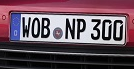

Extracted Text: VOB eNP 300)

Result saved to: C:\Users\mtj02\Desktop\test_result\0231.txt
Processing 0232.tif:


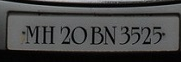

Extracted Text: MH 20BN 3525

Result saved to: C:\Users\mtj02\Desktop\test_result\0232.txt
Processing 0233.tif:


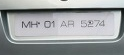

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0233.txt
Processing 0234.tif:


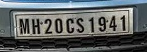

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0234.txt
Processing 0235.tif:


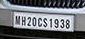

Extracted Text: 
Result saved to: C:\Users\mtj02\Desktop\test_result\0235.txt
Processing 0236.tif:


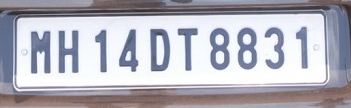

Extracted Text: MH 14078831

Result saved to: C:\Users\mtj02\Desktop\test_result\0236.txt


In [17]:
# Loop through all TIFF images and perform OCR
for filename in os.listdir(tiff_dir):
    if filename.endswith(".tif"):
        # Load the image
        image_path = os.path.join(tiff_dir, filename)
        image = Image.open(image_path)

        # Perform OCR
        extracted_text = pytesseract.image_to_string(image)

        # Display the image and extracted text (optional)
        print(f"Processing {filename}:")
        display(image)
        print("Extracted Text:", extracted_text)

        # Save the result to a text file
        result_path = os.path.join(output_dir, os.path.splitext(filename)[0] + ".txt")
        with open(result_path, "w") as f:
            f.write(extracted_text)

        print(f"Result saved to: {result_path}")
